In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\vinay.chavadi\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [22]:
print(len(messages))

5574


In [5]:
print(messages[0])

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [7]:
import pandas as pd 

In [8]:
msgs = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [9]:
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
msgs.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
msgs.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
msgs['length']=msgs['message'].apply(len)

In [13]:
msgs.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
msgs['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
msgs[msgs['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [16]:
msgs[msgs['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAE4BA1948>,
      dtype=object)

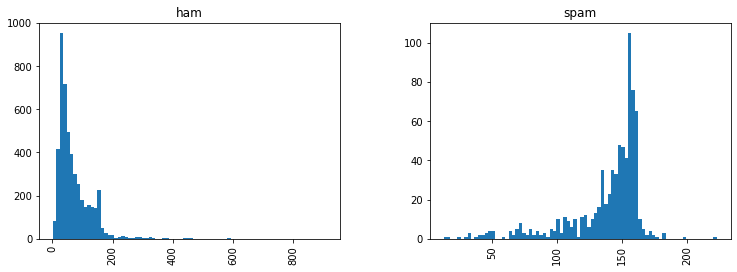

In [17]:
msgs.hist(column='length', by='label', bins=80, figsize=(12,4))

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

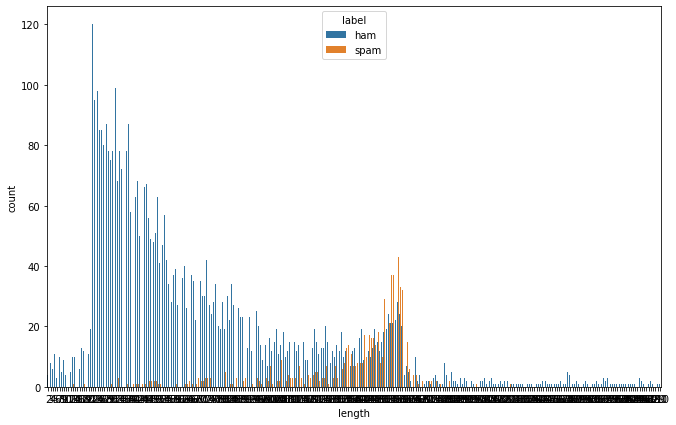

In [19]:
plt.figure(figsize=(11,7))

sns.countplot(x='length',hue='label',data=msgs)

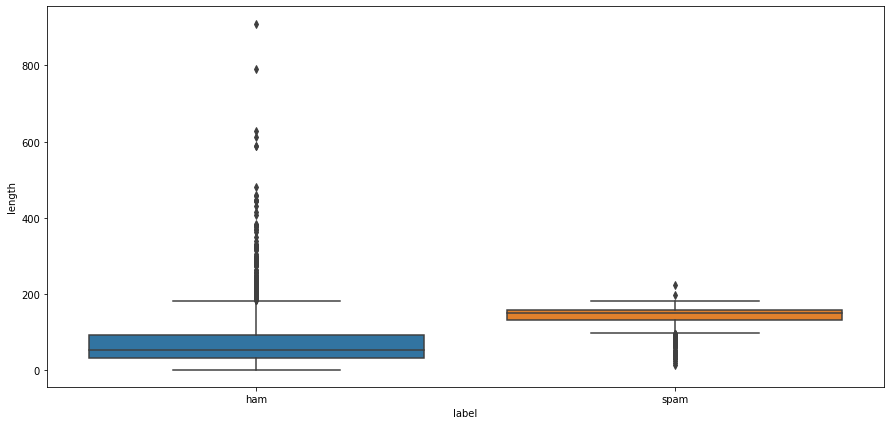

In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(x="label", y= "length", data=msgs)
plt.show()

In [21]:
sns.distplot(msgs['length'].dropna(),kde=False,bins=60, kde=tr)

SyntaxError: keyword argument repeated (<ipython-input-21-bb315dd493d6>, line 1)

Text(0.5, 0, 'Label')

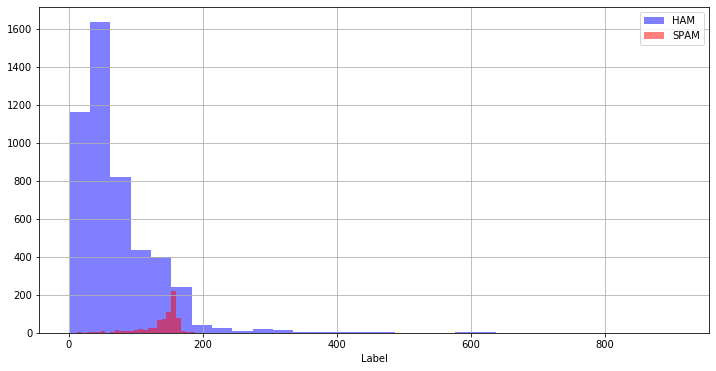

In [23]:
plt.figure(figsize=(12,6))
msgs[msgs['label']=='ham']['length'].hist(alpha=0.5,color='blue',
                                              bins=30,label='HAM')
msgs[msgs['label']=='spam']['length'].hist(alpha=0.5,color='red',
                                              bins=30,label='SPAM')
plt.legend()
plt.xlabel('Label')

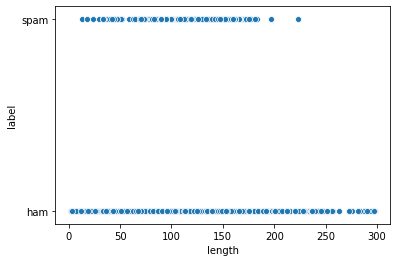

In [26]:
sns.scatterplot(x='length', y='label', data=msgs[msgs['length'] < 300])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAEA6AE208>,
      dtype=object)

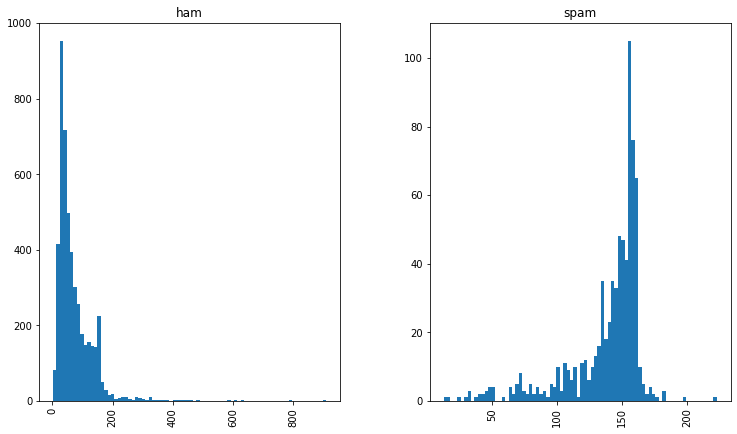

In [27]:
msgs.hist(column='length', by='label', bins=80, figsize=(12,7))

In [54]:
def avgLength(msgs, typ):
    return msgs[msgs['label']=='ham']['length']/msgs['length']

In [55]:
avg

0       1.0
1       1.0
2       NaN
3       1.0
4       1.0
       ... 
5567    NaN
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: length, Length: 5572, dtype: float64

In [46]:
len(msgs['label']=='ham')

5572

In [47]:
len(msgs)

5572

In [57]:
msgs[msgs['label']=='ham'].mean()

length    71.482487
dtype: float64

In [58]:
msgs[msgs['label']=='spam'].mean()

length    138.670683
dtype: float64

In [62]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

In [69]:
import string

In [71]:
sampleMsg =' A simple message !!. Hi There?'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
mess = [c for c in sampleMsg if c not in string.punctuation]

In [74]:
mess

[' ',
 'A',
 ' ',
 's',
 'i',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'H',
 'i',
 ' ',
 'T',
 'h',
 'e',
 'r',
 'e']

In [76]:
from nltk.corpus import stopwords

In [78]:
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
mess=''.join(mess)

In [80]:
mess

' A simple message  Hi There'

In [81]:
#what happens in ''.join(mess) let's see with an example
lst =['a','b','c','d']

In [82]:
lst

['a', 'b', 'c', 'd']

In [83]:
lst =''.join(lst)

In [84]:
lst

'abcd'

In [85]:
lst ='+++'.join(lst)

In [86]:
lst

'a+++b+++c+++d'

In [92]:
clean_mess = [word for word in mess.split() if word.lower() not in stopwords.words('English')]

In [93]:
clean_mess

['simple', 'message', 'Hi']

In [99]:
greetings=['Hi','hello','greetings', 'Ok']

In [100]:
stopwords.words('English').extend(greetings)

In [101]:
clean_mess = [word for word in mess.split() if word.lower() not in stopwords.words('English')]

In [102]:
clean_mess

['simple', 'message', 'Hi']

In [160]:
def text_prc(msg):
    ###
    #1. Remove punc
    #2. Remove stop words
    #3. Return list of clean text words   
    
    ###
    nopunc = [char for char in msg if (char not in string.punctuation)]
    #nopunc = [char for char in msg if not char.isnumeric()]
    nopunc =''.join(nopunc)
    
   
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('English')]
   





In [143]:
msgs['message'].head(5).apply(text_prc)

0    [Go, jurong, point,, crazy.., Available, bugis...
1                 [Ok, lar..., Joking, wif, u, oni...]
2    [Free, entry, wkly, comp, win, FA, Cup, final,...
3    [U, dun, say, early, hor..., U, c, already, sa...
4      [Nah, think, goes, usf,, lives, around, though]
Name: message, dtype: object

# Vectorization - Bag of words model

##Bag of words## = SciKit Leanr's CountVectorizer will then convert collection of text documents to Matrix of token counts
2D model, rows - represented by vocabulary (word) count, columns - actual messages

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

In [162]:
bow = CountVectorizer(analyzer=text_prc).fit(msgs['message'])

In [163]:
print(len(bow.vocabulary_))

11425


In [164]:
mess4 = msgs['message'][3]

In [165]:
mess4

'U dun say so early hor... U c already then say...'

In [166]:
bow4 = bow.transform([mess4])

In [167]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [156]:
print(bow4.shape)

(1, 14398)


In [168]:
bow.get_feature_names()[9554]

'say'

In [170]:
msgs_bow = bow.transform(msgs['message'])

In [172]:
print('Shape of Sparse Matrix: ',msgs_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [174]:
#non-zero occurance
msgs_bow.nnz

50548

## Term frequency Inverse Document Frequecy (TFIDF)

In [175]:
from sklearn.feature_extraction.text import TfidfTransformer

In [182]:
tfidf_transformer = TfidfTransformer().fit(msgs_bow)

In [183]:
tfidf4 = tfidf_transformer.transform(bow4)

In [184]:
print(tfidf4)
#weight value of the words againts the actual value of documents

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [185]:
tfidf_transformer.idf_[bow.vocabulary_['University']]

8.93254160700959

In [186]:
tfidf_transformer.idf_[bow.vocabulary_['say']]

5.231239632897098

In [187]:
msgs_tfidf = tfidf_transformer.transform(msgs_bow)

In [188]:
from sklearn.naive_bayes import MultinomialNB

In [189]:
spam_detect_model = MultinomialNB().fit(msgs_tfidf, msgs['label'])

In [191]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [193]:
msgs['label'][3]

'ham'

In [194]:
all_pred = spam_detect_model.predict(msgs_tfidf)

In [195]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
msgs_train,msgs_test,label_train,label_test = train_test_split(msgs['message'], msgs['label'], test_size=0.3)

In [294]:
msgs_train

3150               Sorry,  in meeting I'll call you later
5549    You know, wot people wear. T shirts, jumpers, ...
2804                    FreeMsg>FAV XMAS TONES!Reply REAL
3249            Also track down any lighters you can find
637     Sweetheart, hope you are not having that kind ...
                              ...                        
1609    Are your freezing ? Are you home yet ? Will yo...
4209    Or i go home first lar ü wait 4 me lor.. I put...
2807                                           Can a not?
4718    K will do, addie &amp; I are doing some art so...
5525    I want to tell you how bad I feel that basical...
Name: message, Length: 3900, dtype: object

In [199]:
from sklearn.pipeline import Pipeline

In [200]:
pipeline = Pipeline([
    
    ('bow', CountVectorizer(analyzer=text_prc)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
    
])

In [291]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

NameError: name 'yelp_class' is not defined

In [203]:
from sklearn.metrics import classification_report

In [207]:
print(classification_report(label_test, predictions ))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1451
        spam       1.00      0.72      0.84       221

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [292]:
from sklearn.naive_bayes import GaussianNB

In [293]:
gnbClassifier = GaussianNB()

In [ ]:
gnbClassifier.fit(label_train,y)